In [2]:
%config Completer.use_jedi = False 

# Cleaning Data from Weather Stations #

**Step 1 - Upload and clean data from one single Weather stations.**


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Exploring Data Stations Data Set


df = pd.read_csv('Data/StationsRecords/DH-4554X.csv', sep = ';', header = None)



In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T09:00:00,0.0,NaN,NaN,NaN,...,9.9,NaN,8.5,9.9,NaN,NaN,NaN,NaN,NaN,NaN
1,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T10:00:00,0.0,NaN,NaN,NaN,...,12.1,NaN,10.3,12.1,NaN,NaN,NaN,NaN,NaN,NaN
2,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T11:00:00,0.0,NaN,NaN,NaN,...,13.7,NaN,12.3,13.7,NaN,NaN,NaN,NaN,NaN,NaN
3,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T12:00:00,0.0,NaN,NaN,NaN,...,16.1,NaN,14.1,16.1,NaN,NaN,NaN,NaN,NaN,NaN
4,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T13:00:00,0.0,NaN,NaN,NaN,...,17.3,NaN,16.3,17.3,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6        14
7     19305
8     19305
9     19305
10       13
11       11
12    19305
13    19305
14        2
15    19305
16        0
17    19305
18    19305
19    19305
20    19305
21    19305
22       50
23    19305
24    19305
25    19305
26    19305
27    19305
28    19305
29       50
30    19305
31       50
32       50
33    19305
34    19305
35    19305
36    19305
37    19305
38    19305
dtype: int64

In [7]:
# Importing just data-filled columns
df = pd.read_csv('Data/StationsRecords/DH-4554X.csv', sep = ';',
                 header = None,
                 usecols=[0,1,2,3,4,5,6,10,11,14,16,22,29,31,32],
                )

In [8]:
# Columns descrpition given within the documentation delivered with the csv in the data folder.

colnames = {0:'StationId',
           1:'Longitud',
           2:'Latitude',
           3:'Altutude',
            4:'StationName',
            5:'DateTime',
            6:'Precipitation',
            10:'WindMax',
            11:'Wind',
            14:'WindDirection',
            16:'WindDirectionMax',
            22:'RelHumidity',
            29:'AirTemperature',
            31:'AirMinTemp',
            32:'AirMaxTemp'}

df.rename(columns=colnames, inplace=True)

In [9]:
df.head()

,StationId,Longitud,Latitude,Altutude,StationName,DateTime,Precipitation,WindMax,Wind,WindDirection,WindDirectionMax,RelHumidity,AirTemperature,AirMinTemp,AirMaxTemp
0,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T09:00:00,0.0,2.8,1.5,92.0,102.0,93.0,9.9,8.5,9.9
1,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T10:00:00,0.0,4.3,1.9,110.0,117.0,82.0,12.1,10.3,12.1
2,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T11:00:00,0.0,4.8,2.1,100.0,97.0,77.0,13.7,12.3,13.7
3,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T12:00:00,0.0,5.2,2.9,184.0,190.0,66.0,16.1,14.1,16.1
4,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T13:00:00,0.0,5.3,2.0,209.0,200.0,56.0,17.3,16.3,17.3


*Data from Stations is given in metric system, we are going to maintain it but for the wind that we would use knots instead of m/s 1 m/s. = 1.9438 Knots because is widely used in nautical domains.*

In [10]:
df.Wind = df.Wind * 1.9438
df.WindMax = df.WindMax * 1.9438 

In [11]:
df.head()

,StationId,Longitud,Latitude,Altutude,StationName,DateTime,Precipitation,WindMax,Wind,WindDirection,WindDirectionMax,RelHumidity,AirTemperature,AirMinTemp,AirMaxTemp
0,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T09:00:00,0.0,5.44264,2.91570,92.0,102.0,93.0,9.9,8.5,9.9
1,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T10:00:00,0.0,8.35834,3.69322,110.0,117.0,82.0,12.1,10.3,12.1
2,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T11:00:00,0.0,9.33024,4.08198,100.0,97.0,77.0,13.7,12.3,13.7
3,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T12:00:00,0.0,10.10776,5.63702,184.0,190.0,66.0,16.1,14.1,16.1
4,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T13:00:00,0.0,10.30214,3.88760,209.0,200.0,56.0,17.3,16.3,17.3


In [12]:
df.describe()

,Longitud,Latitude,Altutude,Precipitation,WindMax,Wind,WindDirection,WindDirectionMax,RelHumidity,AirTemperature,AirMinTemp,AirMaxTemp
count,1.930500e+04,1.930500e+04,19305.0,19291.000000,19292.000000,19294.000000,19303.000000,19305.000000,19255.000000,19255.000000,19255.000000,19255.000000
mean,-7.083610e+00,3.721833e+01,15.0,0.044321,9.941874,4.759026,209.809201,209.048744,75.381927,16.974812,16.505214,17.440556
std,1.291445e-12,1.433202e-11,0.0,0.469344,5.141907,2.752149,110.732486,108.344691,17.747788,6.092386,6.048396,6.119123
min,-7.083610e+00,3.721833e+01,15.0,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,-1.200000,-1.200000,-0.900000
25%,-7.083610e+00,3.721833e+01,15.0,0.000000,5.831400,2.721320,124.000000,127.000000,63.000000,12.700000,12.300000,13.200000
50%,-7.083610e+00,3.721833e+01,15.0,0.000000,9.135860,4.276360,235.000000,235.000000,78.000000,16.900000,16.500000,17.300000
75%,-7.083610e+00,3.721833e+01,15.0,0.000000,13.217840,6.414540,311.000000,305.000000,91.000000,21.000000,20.500000,21.500000
max,-7.083610e+00,3.721833e+01,15.0,18.200000,50.150040,19.243620,360.000000,357.000000,100.000000,41.000000,40.200000,41.900000


In [13]:
df.dtypes

StationId            object
Longitud            float64
Latitude            float64
Altutude            float64
StationName          object
DateTime             object
Precipitation       float64
WindMax             float64
Wind                float64
WindDirection       float64
WindDirectionMax    float64
RelHumidity         float64
AirTemperature      float64
AirMinTemp          float64
AirMaxTemp          float64
dtype: object

In [14]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

<AxesSubplot:xlabel='WindDirection', ylabel='Count'>

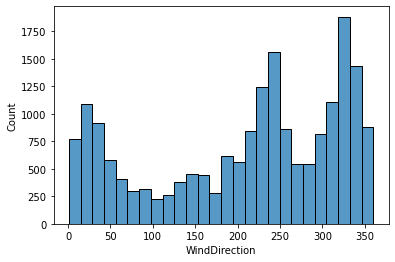

In [15]:
sns.histplot(data=df, x='WindDirection') # Distribution of most common wind directions

**Step 2 - Loop for loading all data station in one single DataFrame**

In [16]:
path = 'Data/StationsRecords/'
csvs= ['DH-4554X.csv', 'DH-6001.csv', 'DH-6329X.csv']

In [61]:
# Loop for uploading all csv station files in one single DataFrame


stations = pd.DataFrame() # reset of df
for i in csvs: #
    df = pd.read_csv(path + i, sep = ';',
                     header = None,
                     usecols=[0,1,2,3,4,5,6,10,11,14,16,22,29,31,32])
    stations = pd.concat([stations,df],axis = 0)
            


In [62]:
# Columns descrpition given within the documentation delivered with the csv in the data folder.

colnames = {0:'StationId',
           1:'Longitud',
           2:'Latitude',
           3:'Altutude',
            4:'StationName',
            5:'DateTime',
            6:'Precipitation',
            10:'WindMax',
            11:'Wind',
            14:'WindDirection',
            16:'WindDirectionMax',
            22:'RelHumidity',
            29:'AirTemperature',
            31:'AirMinTemp',
            32:'AirMaxTemp'}

stations.rename(columns=colnames, inplace=True)

In [63]:
stations['StationName'].value_counts() # Fast check if we properly upload all the registers

CABO DE GATA  FARO    19592
CARTAYA   PEMARES     19305
TARIFA                19110
Name: StationName, dtype: int64